### Tasks:

Data Preprocessing:

Load the dataset into a suitable data structure (e.g., pandas DataFrame).
Handle missing values, if any.
Explore the dataset to understand its structure and attributes.

Feature Extraction:

Decide on the features that will be used for computing similarity (e.g., genres, user ratings).
Convert categorical features into numerical representations if necessary.
Normalize numerical features if required.

Recommendation System:

Design a function to recommend anime based on cosine similarity.
Given a target anime, recommend a list of similar anime based on cosine similarity scores.
Experiment with different threshold values for similarity scores to adjust the recommendation list size.

Evaluation:

Split the dataset into training and testing sets.
Evaluate the recommendation system using appropriate metrics such as precision, recall, and F1-score.
Analyze the performance of the recommendation system and identify areas of improvement.


### loading the dataset and exploring its structure.

In [9]:
import pandas as pd

# Load the dataset
anime_df = pd.read_csv(r"C:\Users\Dell\Downloads\anime.csv")

# Display the first few rows of the dataset
anime_df.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [20]:
#number of unique users in dataset
len(anime_df.anime_id.unique())

12294

In [23]:
anime_df.shape

(12294, 7)

In [22]:
anime_df['rating'].describe()

count    12294.000000
mean         0.576699
std          0.122100
min          0.000000
25%          0.507803
50%          0.585834
75%          0.660264
max          1.000000
Name: rating, dtype: float64

In [10]:
anime_df.describe

<bound method NDFrame.describe of        anime_id                                               name  \
0         32281                                     Kimi no Na wa.   
1          5114                   Fullmetal Alchemist: Brotherhood   
2         28977                                           Gintama°   
3          9253                                        Steins;Gate   
4          9969                                      Gintama&#039;   
...         ...                                                ...   
12289      9316       Toushindai My Lover: Minami tai Mecha-Minami   
12290      5543                                        Under World   
12291      5621                     Violence Gekiga David no Hoshi   
12292      6133  Violence Gekiga Shin David no Hoshi: Inma Dens...   
12293     26081                   Yasuji no Pornorama: Yacchimae!!   

                                                   genre   type episodes  \
0                   Drama, Romance, School, Super

<Axes: >

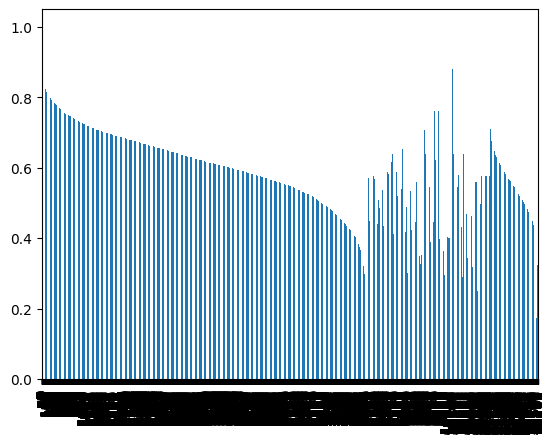

In [30]:
anime_df['rating'].plot(kind='bar')

<Axes: ylabel='Frequency'>

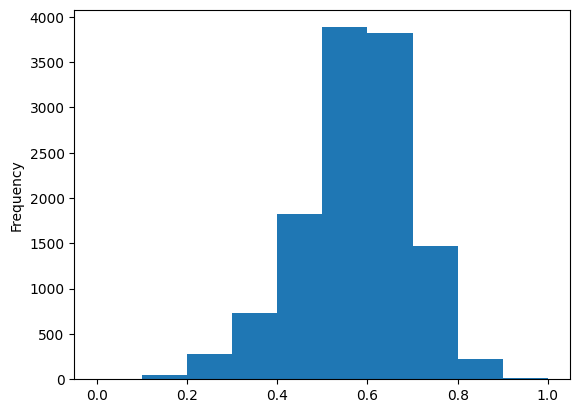

In [31]:
anime_df['rating'].plot(kind='hist')

### Data Preprocessing
Handling Missing Values

In [12]:
# Handle missing values
anime_df['genre'].fillna('Unknown', inplace=True)
anime_df['type'].fillna('Unknown', inplace=True)
anime_df['rating'].fillna(anime_df['rating'].mean(), inplace=True)

# Verify no missing values left
anime_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


#### Feature Extraction
For genre, we'll create a binary representation (one-hot encoding). For rating and members, we'll normalize them.

In [13]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# One-hot encode genres
genre_onehot = anime_df['genre'].str.get_dummies(sep=', ')

# Normalize rating and members
scaler = MinMaxScaler()
anime_df[['rating', 'members']] = scaler.fit_transform(anime_df[['rating', 'members']])

# Combine all features into a single DataFrame
features = pd.concat([genre_onehot, anime_df[['rating', 'members']]], axis=1)

features.head()


,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi,Yuri,rating,members
0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0.924370,0.197872
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0.911164,0.782770
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.909964,0.112689
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0.900360,0.664325
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.899160,0.149186


#### Building the Recommendation System
We'll now build the recommendation system using cosine similarity.

Compute Cosine Similarity: Using the feature matrix.
Recommend Anime: Based on the similarity scores.
Let's define the function to recommend anime based on cosine similarity.

In [16]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(features, features)

def get_recommendations(title, anime_df, cosine_sim):
    # Get the index of the anime that matches the title
    idx = anime_df[anime_df['name'] == title].index[0]

    # Get the pairwise similarity scores of all animes with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the animes based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar animes
    sim_scores = sim_scores[1:11]

    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar animes
    return anime_df.iloc[anime_indices][['name', 'rating', 'members']]



In [17]:
# Example usage
get_recommendations('Kimi no Na wa.', anime_df, cosine_sim)


,name,rating,members
5805,Wind: A Breath of Heart OVA,0.561825,0.002010
6394,Wind: A Breath of Heart (TV),0.536615,0.007666
1111,Aura: Maryuuin Kouga Saigo no Tatakai,0.720288,0.022284
504,"Clannad: After Story - Mou Hitotsu no Sekai, K...",0.762305,0.136461
208,Kokoro ga Sakebitagatterunda.,0.798319,0.058829
1201,Angel Beats!: Another Epilogue,0.715486,0.132334
1435,True Tears,0.705882,0.117011
1907,Myself; Yourself,0.689076,0.113491
1631,Kimikiss Pure Rouge,0.697479,0.057407
2300,Koi to Senkyo to Chocolate,0.675870,0.090291


### Interview Questions:
